Machine Learning Project : Regression Analysis

In [1]:
# Import time
import time

# Import Data Manipulation libraries
import numpy as np
import pandas as pd

# Import Data Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Import filter warnings libraries
import warnings
warnings.filterwarnings('ignore')

#Import logging libraries
import logging
logging.basicConfig(level = logging.INFO,
                    format = '%(asctime)s - %(levelname)s - %(message)s',
                    filemode = 'w',
                    filename = 'model.log',
                    force = True)

# Import the scikit-learn libraries
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [2]:
# Step 2: Import dataset

data = pd.DataFrame({
    'feature1': np.random.randint(0, 10000, 1000),
    'feature2': np.random.randint(0, 30, 1000),
    'feature3': np.random.randint(20, 10000, 1000),
    'target': np.random.randint(0, 100, 1000)
})

In [3]:
# Steo 3: Checking dataset info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   feature1  1000 non-null   int64
 1   feature2  1000 non-null   int64
 2   feature3  1000 non-null   int64
 3   target    1000 non-null   int64
dtypes: int64(4)
memory usage: 31.4 KB


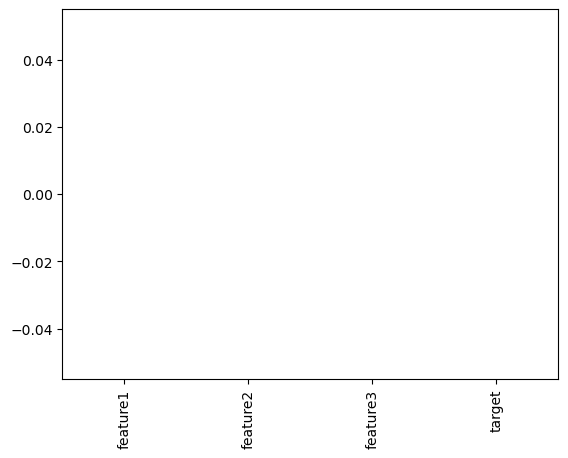

In [4]:
# Step 4: Checking null values in dataset
data.isnull().sum().plot(kind = 'bar')
plt.show()

In [5]:
# Step 4: EDA

from collections import OrderedDict

stats = []

for i in data.columns:
    numerical_stats = OrderedDict({
        'feature': i,
        'mean': data[i].mean(),
        'median': data[i].median(),
        'min': data[i].min(),
        'max': data[i].max(),
        'range': data[i].max() - data[i].min(),
        'Q1': data[i].quantile(0.25),
        'Q3': data[i].quantile(0.75),
        'IQR': data[i].quantile(0.75) - data[i].quantile(0.25),
        'Skewness': data[i].skew(),
        'Kurtosis': data[i].kurt()
        })
    stats.append(numerical_stats)
    report = pd.DataFrame(stats)
report

,feature,mean,median,min,max,range,Q1,Q3,IQR,Skewness,Kurtosis
0,feature1,5001.489,4997.5,7,9977,9970,2562.5,7478.25,4915.75,-0.017138,-1.201206
1,feature2,14.226,14.0,0,29,29,6.0,21.00,15.00,0.027044,-1.195187
2,feature3,4951.491,5031.0,22,9995,9973,2383.5,7384.00,5000.50,0.024258,-1.193614
3,target,49.900,50.0,0,99,99,24.0,76.00,52.00,-0.027494,-1.228118


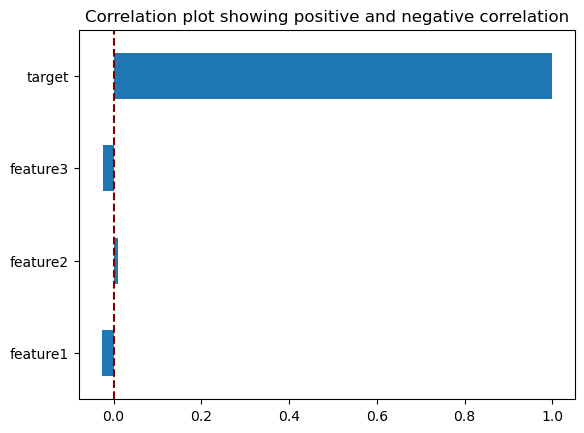

In [6]:
# Checking the correlation of feature w.r.t target column

data.corr()['target'].plot(kind = 'barh')
plt.axvline(0, linestyle = '--', color = 'maroon')
plt.title('Correlation plot showing positive and negative correlation')
plt.show()

In [7]:
start = time.time()

In [8]:
end = time.time()

In [9]:
time = end - start
logging.info(f'Time taken : {time} seconds')
time

0.011057376861572266

In [10]:
# step 6: Model Building

X = data.drop(columns = 'target', axis = 1) # Independent column

y = data['target'] # Dependent column

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42) # Maximum value of random state is 0 to 4294967295

# Fit is always done with training data
sc = MinMaxScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# Linear Regression
from sklearn.linear_model import LinearRegression

model_lr = LinearRegression().fit(X_train, y_train)

y_pred_lr = model_lr.predict(X_test)

r2_score(y_test, y_pred_lr)


-0.0005239244681964905

<Axes: xlabel='target'>

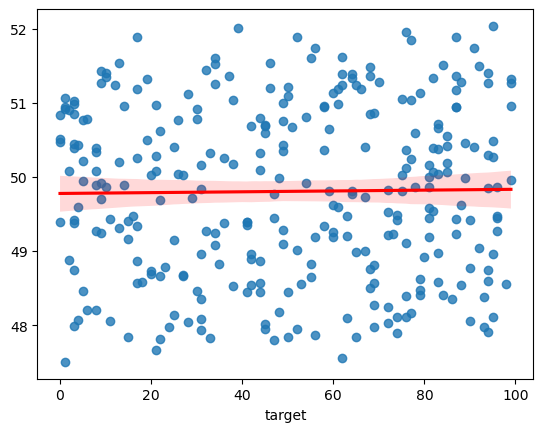

In [15]:
sns.regplot(x = y_test, y = y_pred_lr, line_kws = {'color': 'red'})